In [120]:
# Import Dependencies
import os
from dotenv import load_dotenv
import requests
from alpha_vantage.cryptocurrencies import CryptoCurrencies
from alpha_vantage.techindicators import TechIndicators
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [121]:
# RUN ONCE
load_dotenv()
API_KEY = os.getenv('SPECIAL_API_KEY')

In [122]:
# RUN ONCE
params = {
 'function': 'CRYPTO_INTRADAY',
 'symbol': 'ETH',
 'market': 'USD',
 'interval': '5min',
 'time_zone': 'US/Eastern Time',
 'apikey': API_KEY
 }

r = requests.get('https://www.alphavantage.co/query', params=params)
print(r.url)
price_data = r.json()
print(price_data.keys())
r.close()

https://www.alphavantage.co/query?function=CRYPTO_INTRADAY&symbol=ETH&market=USD&interval=5min&time_zone=US%2FEastern+Time&apikey=J1CWSFE0KTEO2I97
dict_keys(['Meta Data', 'Time Series Crypto (5min)'])


In [123]:
price_df = pd.DataFrame(price_data['Time Series Crypto (5min)']).T
print(price_data['Meta Data'])
price_df.reset_index(inplace=True)
price_df['date.utc'] = price_df['index']
price_df = price_df.drop('index', 1)
price_df.head()

{'1. Information': 'Crypto Intraday (5min) Time Series', '2. Digital Currency Code': 'ETH', '3. Digital Currency Name': 'Ethereum', '4. Market Code': 'USD', '5. Market Name': 'United States Dollar', '6. Last Refreshed': '2022-01-03 07:30:00', '7. Interval': '5min', '8. Output Size': 'Compact', '9. Time Zone': 'UTC'}


/tmp/ipykernel_255/2187447110.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  price_df = price_df.drop('index', 1)


,1. open,2. high,3. low,4. close,5. volume,date.utc
0,3806.87000,3808.67000,3806.31000,3807.90000,202,2022-01-03 07:30:00
1,3802.82000,3808.40000,3802.42000,3806.87000,420,2022-01-03 07:25:00
2,3799.86000,3802.83000,3799.00000,3802.81000,369,2022-01-03 07:20:00
3,3802.76000,3802.83000,3798.78000,3799.86000,357,2022-01-03 07:15:00
4,3804.79000,3804.89000,3801.23000,3802.76000,290,2022-01-03 07:10:00


In [124]:
# RUN ONCE
params = {
 'function': 'BBANDS',
 'symbol': 'ETHUSD',
 'interval': '5min',
 'time_period': '20',
 'series_type': 'close',
 'apikey': API_KEY
 }

r = requests.get('https://www.alphavantage.co/query', params=params)
print(r.url)
bband_data = r.json()
print(bband_data.keys())
r.close()

https://www.alphavantage.co/query?function=BBANDS&symbol=ETHUSD&interval=5min&time_period=20&series_type=close&apikey=J1CWSFE0KTEO2I97
dict_keys(['Meta Data', 'Technical Analysis: BBANDS'])


In [125]:
bbands_df = pd.DataFrame(bband_data['Technical Analysis: BBANDS']).T
print(bband_data['Meta Data'])
bbands_df.reset_index(inplace=True)
bbands_df['date.est1'] = bbands_df['index']
bbands_df = bbands_df.drop('index', 1)
bbands_df.head()

{'1: Symbol': 'ETHUSD', '2: Indicator': 'Bollinger Bands (BBANDS)', '3: Last Refreshed': '2022-01-03 02:30:00', '4: Interval': '5min', '5: Time Period': 20, '6.1: Deviation multiplier for upper band': 2, '6.2: Deviation multiplier for lower band': 2, '6.3: MA Type': 0, '7: Series Type': 'close', '8: Time Zone': 'US/Eastern Time'}


/tmp/ipykernel_255/2181832318.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  bbands_df = bbands_df.drop('index', 1)


,Real Middle Band,Real Upper Band,Real Lower Band,date.est1
0,3806.4665,3813.6408,3799.2922,2022-01-03 02:30
1,3806.7455,3814.5292,3798.9618,2022-01-03 02:25
2,3806.9685,3815.0052,3798.9318,2022-01-03 02:20
3,3807.6855,3816.6189,3798.7521,2022-01-03 02:15
4,3808.6135,3817.9494,3799.2776,2022-01-03 02:10


In [126]:
# RUN ONCE
params = {
 'function': 'MACD',
 'symbol': 'ETHUSD',
 'interval': '5min',
 'series_type': 'close',
 'apikey': API_KEY
 }

r = requests.get('https://www.alphavantage.co/query', params=params)
print(r.url)
macd_data = r.json()
print(macd_data.keys())
r.close()

https://www.alphavantage.co/query?function=MACD&symbol=ETHUSD&interval=5min&series_type=close&apikey=J1CWSFE0KTEO2I97
dict_keys(['Meta Data', 'Technical Analysis: MACD'])


In [127]:
macd_df = pd.DataFrame(macd_data['Technical Analysis: MACD']).T
print(macd_data['Meta Data'])
macd_df.reset_index(inplace=True)
macd_df['date.est2'] = macd_df['index']
macd_df = macd_df.drop('index', 1)
macd_df.head()

{'1: Symbol': 'ETHUSD', '2: Indicator': 'Moving Average Convergence/Divergence (MACD)', '3: Last Refreshed': '2022-01-03 02:30:00', '4: Interval': '5min', '5.1: Fast Period': 12, '5.2: Slow Period': 26, '5.3: Signal Period': 9, '6: Series Type': 'close', '7: Time Zone': 'US/Eastern'}


/tmp/ipykernel_255/1630572137.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  macd_df = macd_df.drop('index', 1)


,MACD_Signal,MACD,MACD_Hist,date.est2
0,0.6717,0.2917,-0.3801,2022-01-03 02:30
1,0.7668,0.0281,-0.7387,2022-01-03 02:25
2,0.9514,-0.2038,-1.1553,2022-01-03 02:20
3,1.2402,-0.0835,-1.3238,2022-01-03 02:15
4,1.5712,0.3716,-1.1995,2022-01-03 02:10


In [128]:
# RUN ONCE
params = {
 'function': 'VWAP',
 'symbol': 'ETHUSD',
 'interval': '5min',
 'apikey': API_KEY
 }

r = requests.get('https://www.alphavantage.co/query', params=params)
print(r.url)
vwap_data = r.json()
print(vwap_data.keys())
r.close()

https://www.alphavantage.co/query?function=VWAP&symbol=ETHUSD&interval=5min&apikey=J1CWSFE0KTEO2I97
dict_keys(['Meta Data', 'Technical Analysis: VWAP'])


In [129]:
vwap_df = pd.DataFrame(vwap_data['Technical Analysis: VWAP']).T
print(vwap_data['Meta Data'])
vwap_df.reset_index(inplace=True)
vwap_df['date.est3'] = vwap_df['index']
vwap_df = vwap_df.drop('index', 1)
vwap_df.head()

{'1: Symbol': 'ETHUSD', '2: Indicator': 'Volume Weighted Average Price (VWAP)', '3: Last Refreshed': '2022-01-03 02:30:00', '4: Interval': '5min', '5: Time Zone': 'US/Eastern'}


/tmp/ipykernel_255/3144706710.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  vwap_df = vwap_df.drop('index', 1)


,VWAP,date.est3
0,3808.1225,2022-01-03 02:30
1,3808.1287,2022-01-03 02:25
2,3808.1882,2022-01-03 02:20
3,3808.3476,2022-01-03 02:15
4,3808.5345,2022-01-03 02:10


In [130]:
df = price_df.join(bbands_df, how = 'left')
df = df.join(macd_df, how = 'left')
df = df.join(vwap_df, how = 'left')
df.head()

,1. open,2. high,3. low,4. close,5. volume,date.utc,Real Middle Band,Real Upper Band,Real Lower Band,date.est1,MACD_Signal,MACD,MACD_Hist,date.est2,VWAP,date.est3
0,3806.87000,3808.67000,3806.31000,3807.90000,202,2022-01-03 07:30:00,3806.4665,3813.6408,3799.2922,2022-01-03 02:30,0.6717,0.2917,-0.3801,2022-01-03 02:30,3808.1225,2022-01-03 02:30
1,3802.82000,3808.40000,3802.42000,3806.87000,420,2022-01-03 07:25:00,3806.7455,3814.5292,3798.9618,2022-01-03 02:25,0.7668,0.0281,-0.7387,2022-01-03 02:25,3808.1287,2022-01-03 02:25
2,3799.86000,3802.83000,3799.00000,3802.81000,369,2022-01-03 07:20:00,3806.9685,3815.0052,3798.9318,2022-01-03 02:20,0.9514,-0.2038,-1.1553,2022-01-03 02:20,3808.1882,2022-01-03 02:20
3,3802.76000,3802.83000,3798.78000,3799.86000,357,2022-01-03 07:15:00,3807.6855,3816.6189,3798.7521,2022-01-03 02:15,1.2402,-0.0835,-1.3238,2022-01-03 02:15,3808.3476,2022-01-03 02:15
4,3804.79000,3804.89000,3801.23000,3802.76000,290,2022-01-03 07:10:00,3808.6135,3817.9494,3799.2776,2022-01-03 02:10,1.5712,0.3716,-1.1995,2022-01-03 02:10,3808.5345,2022-01-03 02:10


In [131]:
# Dictionary with original and new column names.
new_col_names = {'1. open': 'open',
        '2. high': 'high',
        '3. low': 'low',
        '4. close': 'close',
        '5. volume': 'volume',
        'Real Middle Band': 'bband.mid',
        'Real Upper Band': 'bband.up',
        'Real Lower Band': 'bband.low',
        'MACD_Signal': 'macd.sig',
        'MACD_Hist': 'macd.hist',
        'MACD': 'macd',
        'VWAP': 'vwap'}
  
# Call rename() method. 
df.rename(columns= new_col_names,
          inplace=True)

In [132]:
df = df.drop(['date.est1', 'date.est2', 'date.est3'], 1)
df['date.utc'] = pd.to_datetime(df['date.utc'])
df = df.set_index('date.utc')

/tmp/ipykernel_255/1508849808.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(['date.est1', 'date.est2', 'date.est3'], 1)


In [133]:
df['open'] = df['open'].astype(str).astype(float)
df['high'] = df['high'].astype(str).astype(float)
df['low'] = df['low'].astype(str).astype(float)
df['close'] = df['close'].astype(str).astype(float)
df['volume'] = df['volume'].astype(str).astype(float)
df['bband.low'] = df['bband.low'].astype(str).astype(float)
df['bband.up'] = df['bband.up'].astype(str).astype(float)
df['bband.mid'] = df['bband.mid'].astype(str).astype(float)
df['macd'] = df['macd'].astype(str).astype(float)
df['macd.hist'] = df['macd.hist'].astype(str).astype(float)
df['macd.sig'] = df['macd.sig'].astype(str).astype(float)
df['vwap'] = df['vwap'].astype(str).astype(float)

In [134]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2022-01-03 07:30:00 to 2022-01-02 23:15:00
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       100 non-null    float64
 1   high       100 non-null    float64
 2   low        100 non-null    float64
 3   close      100 non-null    float64
 4   volume     100 non-null    float64
 5   bband.mid  100 non-null    float64
 6   bband.up   100 non-null    float64
 7   bband.low  100 non-null    float64
 8   macd.sig   100 non-null    float64
 9   macd       100 non-null    float64
 10  macd.hist  100 non-null    float64
 11  vwap       100 non-null    float64
dtypes: float64(12)
memory usage: 10.2 KB
None


In [135]:
df.head()

,open,high,low,close,volume,bband.mid,bband.up,bband.low,macd.sig,macd,macd.hist,vwap
date.utc,,,,,,,,,,,,
2022-01-03 07:30:00,3806.87,3808.67,3806.31,3807.90,202.0,3806.4665,3813.6408,3799.2922,0.6717,0.2917,-0.3801,3808.1225
2022-01-03 07:25:00,3802.82,3808.40,3802.42,3806.87,420.0,3806.7455,3814.5292,3798.9618,0.7668,0.0281,-0.7387,3808.1287
2022-01-03 07:20:00,3799.86,3802.83,3799.00,3802.81,369.0,3806.9685,3815.0052,3798.9318,0.9514,-0.2038,-1.1553,3808.1882
2022-01-03 07:15:00,3802.76,3802.83,3798.78,3799.86,357.0,3807.6855,3816.6189,3798.7521,1.2402,-0.0835,-1.3238,3808.3476
2022-01-03 07:10:00,3804.79,3804.89,3801.23,3802.76,290.0,3808.6135,3817.9494,3799.2776,1.5712,0.3716,-1.1995,3808.5345


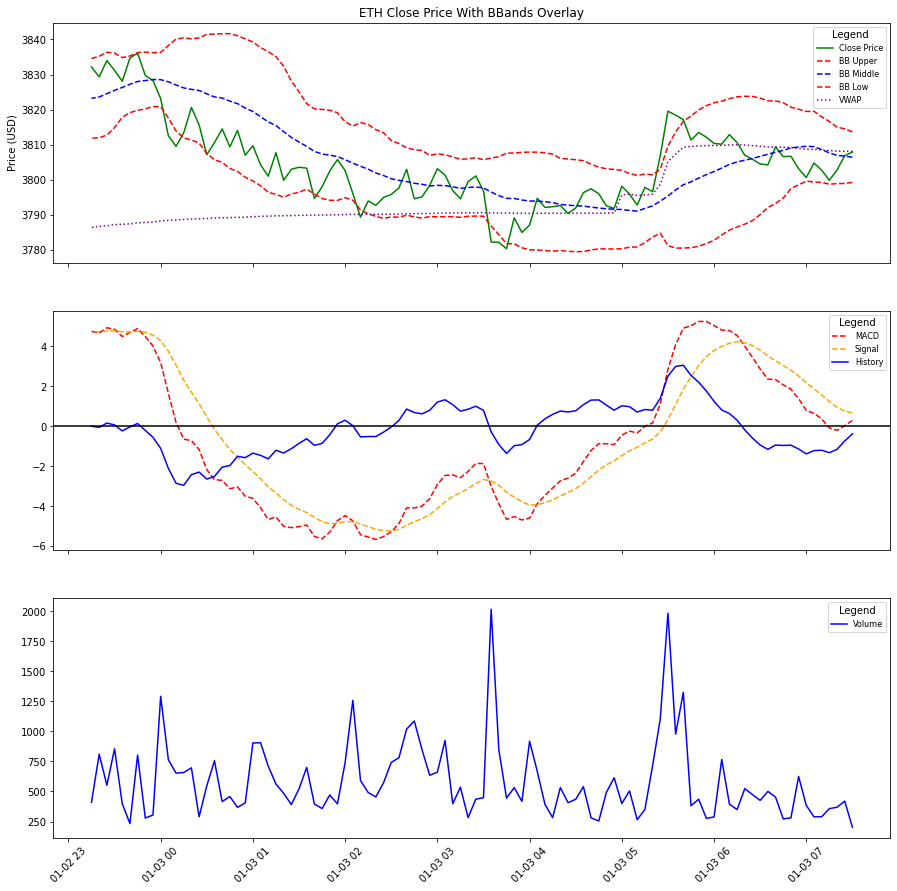

In [136]:
# Case Study 5
# Define figure and axis
fig, axs = plt.subplots(3,1, sharex = True, figsize = (15, 15))

# Set title and axes labels
axs[0].set_title("ETH Close Price With BBands Overlay")
axs[0].set_ylabel("Price (USD)")

# Create the plot 
axs[0].plot(df['close'], "-", label = "Close Price", color = "green")
axs[0].plot(df['bband.up'], "--", label = "BB Upper", color = "red")
axs[0].plot(df['bband.mid'], "--", label = "BB Middle", color = "blue")
axs[0].plot(df['bband.low'], "--", label = "BB Low", color = "red")
axs[0].plot(df['vwap'], ":", label = "VWAP", color = "purple")
axs[0].legend(title = "Legend", fontsize = 8, loc = "upper right")

axs[1].plot(df['macd'], "--", label = "MACD", color = "red")
axs[1].plot(df['macd.sig'], "--", label = "Signal", color = "orange")
axs[1].plot(df['macd.hist'], "-", label = "History", color = "blue")
axs[1].legend(title = "Legend", fontsize = 8) #bbox_to_anchor=(1.25, .6))
axs[1].axhline(y=0, color = 'black')

axs[2].plot(df['volume'], "-", label = "Volume", color = "blue")
axs[2].legend(title = "Legend", fontsize = 8)
plt.xticks(rotation=45)

# Show 
plt.show()

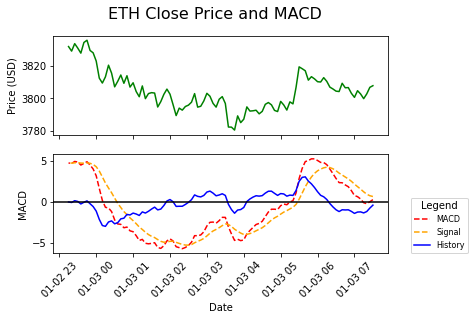

In [137]:
# Define figure and axis
fig, axs = plt.subplots(2,1, sharex=True)

# Set title and axes labels
fig.suptitle(t = "ETH Close Price and MACD", fontsize = 16)
#axs.set_title("ETH Close Price With MACD Overlay")

axs[1].set_xlabel("Date")
axs[0].set_ylabel("Price (USD)")
axs[1].set_ylabel("MACD")


    
# Create the plot 
axs[0].plot(df['close'], "-", label = "Close Price", color = "green")

axs[1].plot(df['macd'], "--", label = "MACD", color = "red")
axs[1].plot(df['macd.sig'], "--", label = "Signal", color = "orange")
axs[1].plot(df['macd.hist'], "-", label = "History", color = "blue")
axs[1].legend(title = "Legend", fontsize = 8, bbox_to_anchor=(1.25, .6), loc="upper right")
plt.xticks(rotation=45)
axs[1].axhline(y=0, color = 'black')

# Show 
plt.show()

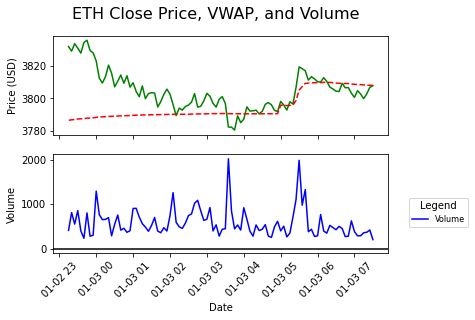

In [138]:
# Define figure and axis
fig, axs = plt.subplots(2,1, sharex=True)

# Set title and axes labels
fig.suptitle(t = "ETH Close Price, VWAP, and Volume", fontsize = 16)
#axs.set_title("ETH Close Price With MACD Overlay")

axs[1].set_xlabel("Date")
axs[0].set_ylabel("Price (USD)")
axs[1].set_ylabel("Volume")


    
# Create the plot 
axs[0].plot(df['close'], "-", label = "Close Price", color = "green")
axs[0].plot(df['vwap'], "--", label = "VWAP", color = "red")

axs[1].plot(df['volume'], "-", label = "Volume", color = "blue")

plt.legend(title = "Legend", fontsize = 8, bbox_to_anchor=(1.25, .6), loc="upper right")
plt.xticks(rotation=45)
axs[1].axhline(y=0, color = 'black')

# Show 
plt.show()

In [139]:
# begin trading strategy
